# **Práctica final individual de Métodos Estadísticos en Minería de datos**
----------

- Leire Pantoja Jiménez

Una empresa de **telecomunicaciones** se enfrenta al reto de la centralización nacional y ha  propuesto desarrollar una estrategia de fidelización de clientes para lograrlo. La clave del éxito es determinar qué clientes comprarán productos adicionales. Para solucionar esta tarea se cuenta con una base de datos que contiene **34 variables** que contienen diversos datos de cada cliente, como edad, megas totales, facturas y llamadas recibidas. También existe una variable que indica si el cliente comprará un producto nuevo en el próximo mes (1) o no (0).

La estrategia propuesta implica la construcción de dos modelos de predicción, uno de ellos basado en redes neuronales utilizando **Tensorflow**, una poderosa herramienta para capturar patrones complejos en datos. Este enfoque avanzado identifica relaciones no lineales y mejora la precisión del modelo. Luego se aplicará una umbralización de los resultados para determinar qué clientes tienen más probabilidades de comprar productos adicionales.

La validación del modelo es importante para evaluar su desempeño. Se utilizarán métricas como precisión o la sensibilidad para medir la capacidad de un modelo para predecir con precisión las compras de nuevos productos por parte de los consumidores. Esta validación asegura la confiabilidad del modelo y puede proporcionar información valiosa.


# **Análisis exploratorio de datos**


El **análisis de datos exploratorios (EDA)** es un paso crítico en cualquier proyecto de análisis de datos. Este primer paso proporciona una comprensión de la naturaleza y estructura de los datos con los que está trabajando, lo cual es esencial para tomar decisiones informadas en el proceso de análisis.

El EDA también juega un papel importante en la identificación de posibles **problemas** en los datos, como la presencia de **valores atípicos** que pueden afectar la calidad del análisis. Además, la detección de valores faltantes requiere especial atención, ya que pueden tener un impacto significativo en la interpretación de los resultados. Dependiendo del número y la naturaleza de los valores faltantes, se pueden considerar varias estrategias, como imputar datos o excluir observaciones incompletas.

Otro aspecto importante del EDA es la **visualización de datos**, que proporciona una representación intuitiva de distribuciones de variables y las relaciones entre ellas. Se utilizan gráficos como histogramas, diagramas de dispersión y diagramas de caja para explorar patrones y tendencias en los datos. Esta visualización no sólo facilita la comprensión de la información de los datos, sino que también puede revelar patrones o anomalías interesantes que pueden no ser inmediatamente obvias.

Por último, el propósito del análisis exploratorio de datos es proporcionar una base sólida para la toma de decisiones en etapas posteriores del análisis. La información obtenida en este paso no sólo determina la calidad de los datos, sino que también orienta las decisiones sobre las transformaciones necesarias, la selección de variables apropiadas y la selección de métodos de modelado apropiados.


In [ ]:
# Se cargan todas las librerías que se van a utilizar en la realización de la práctica.

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
import warnings
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import regularizers



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se cargan los datos y se visualizan.
data = pd.read_csv("/content/drive/MyDrive/Mineria de datos/datos_practica_small_20k_con_mes.csv")
pd.set_option('display.max_columns', None)
data


,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,NUM_LINEAS_FIJAS,NUM_DIAS_CONVERGENTE,NUM_LINEAS_FIJAS_POSPAGO,NUM_SERVICIOS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,LLAMADAS_MOVILES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS_POSPAGO,NUM_DESACTIVACIONES_FIJAS,NUM_LINEAS_TECNOLOGIA_DESCONOCIDA,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
0,201901,232.121597,10.186000,0.000000,4523.0,1183.0,28.0,232.121597,39.0,54.0,8.418200,1,1,0,0,0,1,44,0,0.0,1,0.0,0,0,1,44.0,21.683399,0,1.767800,0,100.0,2,1,0.0,0.264612,0
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,26.450001,1,1,0,0,0,1,387,1,0.0,2,0.0,0,0,1,387.0,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
2,201906,2141.692810,37.442001,31.400000,13.0,13.0,0.0,2141.692810,47.0,4.0,35.400000,2,2,0,0,0,2,1389,0,0.0,2,4.0,0,0,2,1389.0,108.850102,0,2.042002,0,100.0,2,2,0.0,0.156041,0
3,202006,3181.986496,20.001000,16.530000,0.0,0.0,0.0,3181.986496,43.0,0.0,16.530000,1,2,0,0,0,2,154,2,0.0,3,0.0,0,0,2,154.0,65.799899,0,3.471001,0,100.0,2,3,0.0,0.228810,1
4,202001,25626.083984,37.005001,26.450001,72783.0,27609.0,151.0,25626.083984,40.0,329.0,31.450001,1,1,0,0,0,1,2205,0,0.0,1,5.0,0,0,1,2205.0,519.683305,1,5.555000,0,100.0,1,1,0.0,0.210286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,202006,20431.367188,21.640001,16.530001,8226.0,4699.0,61.0,20431.367188,39.0,163.0,17.884001,1,1,0,0,0,1,1440,1,0.0,2,0.0,0,0,1,1440.0,123.550202,1063,3.756000,0,100.0,1,2,0.0,0.180917,1
19996,202010,2717.812500,36.593000,23.969999,22401.0,7645.0,33.0,2717.812500,70.0,87.0,30.241999,1,1,0,0,0,1,1459,0,0.0,1,0.0,0,0,1,1459.0,124.883500,0,6.351001,0,100.0,1,1,0.0,0.171539,1
19997,202007,21.569700,9.544000,0.000000,1.0,1.0,0.0,21.569700,52.0,1.0,7.887900,1,1,0,0,0,1,4540,1,0.0,1,0.0,0,0,1,4540.0,6.500000,0,1.656100,0,100.0,1,1,0.0,0.201103,0
19998,202007,16230.392578,32.005001,26.450001,3545.0,2600.0,8.0,16230.392578,40.0,36.0,26.450001,1,1,0,0,0,1,365,0,0.0,1,0.0,0,0,1,NaN,241.733403,1,5.555000,0,100.0,1,1,0.0,0.274430,1


El conjunto de datos está compuesto de **20 000 instancias y 34 variables**. Se realiza un primer análisis exploratorio.

In [ ]:
data.describe()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,NUM_LINEAS_FIJAS,NUM_DIAS_CONVERGENTE,NUM_LINEAS_FIJAS_POSPAGO,NUM_SERVICIOS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,LLAMADAS_MOVILES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS_POSPAGO,NUM_DESACTIVACIONES_FIJAS,NUM_LINEAS_TECNOLOGIA_DESCONOCIDA,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
count,20000.000000,19741.000000,19924.000000,19924.000000,19843.000000,19843.000000,19843.000000,19749.000000,19971.000000,19843.000000,19924.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,19918.000000,20000.000000,19924.000000,20000.000000,20000.000000,20000.00000,19450.000000,19749.000000,20000.000000,19924.000000,20000.00000,19737.000000,20000.000000,20000.000000,19918.000000,18677.000000,20000.000000
mean,201948.470400,12307.320625,40.939452,25.179305,19282.843471,10334.947941,62.941239,12288.026161,43.990937,156.408456,35.281971,1.149750,1.38260,0.001100,17.082050,0.001100,1.38260,1314.952750,0.699300,0.277136,1.800800,6.967358,0.002350,0.002350,1.38260,1259.564010,361.817034,148.792200,5.657482,0.00785,99.975217,1.432750,1.792750,0.913010,0.257017,0.311050
std,49.255692,20115.499610,30.326117,13.067181,31773.406451,18971.928733,93.528782,20112.795794,14.125926,227.913588,27.637112,0.436273,0.70565,0.034624,120.816511,0.034624,0.70565,930.550636,1.185095,7.815587,1.348892,17.793423,0.048421,0.048421,0.70565,940.445974,543.391221,476.199046,3.552509,0.10435,1.284268,0.756972,1.329882,30.432569,0.073077,0.462935
min,201901.000000,0.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,-0.001700,0.000000,1.00000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,-1.190000,0.00000,0.000000,1.000000,0.000000,0.000000,0.039562,0.000000
25%,201905.000000,1929.673340,24.999000,15.700000,1777.000000,705.500000,11.000000,1915.529785,33.000000,29.000000,20.660000,1.000000,1.00000,0.000000,0.000000,0.000000,1.00000,563.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,495.000000,64.999998,0.000000,3.297000,0.00000,100.000000,1.000000,1.000000,0.000000,0.199451,0.000000
50%,201911.000000,5931.522949,33.004000,23.969999,8011.000000,3631.000000,36.000000,5898.413086,43.000000,87.000000,28.033800,1.000000,1.00000,0.000000,0.000000,0.000000,1.00000,1138.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1051.000000,178.966798,1.000000,5.034000,0.00000,100.000000,1.000000,1.000000,0.000000,0.261877,0.000000
75%,202005.000000,16013.454310,50.124250,26.460000,23009.500000,11846.500000,82.000000,15967.201660,54.000000,199.000000,43.442500,1.000000,2.00000,0.000000,0.000000,0.000000,2.00000,1935.000000,1.000000,0.000000,2.000000,8.000000,0.000000,0.000000,2.00000,1870.000000,443.583287,2.000000,6.768002,0.00000,100.000000,2.000000,2.000000,0.000000,0.296955,1.000000
max,202011.000000,853613.593750,1246.438000,133.890000,584239.000000,422724.000000,6220.000000,853613.593750,98.000000,12497.000000,1223.800001,5.000000,8.00000,2.000000,3387.000000,2.000000,8.00000,4959.000000,22.000000,412.000000,19.000000,1116.000000,1.000000,1.000000,8.00000,4959.000000,12316.250395,4056.000000,93.483509,4.00000,100.000000,8.000000,18.000000,2089.316758,0.380171,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

Todas las variables están en formato *int64* o *float64*, incluida la variable respuesta "**TARGET**". Se grafican las variables para observar como se distribuyen.

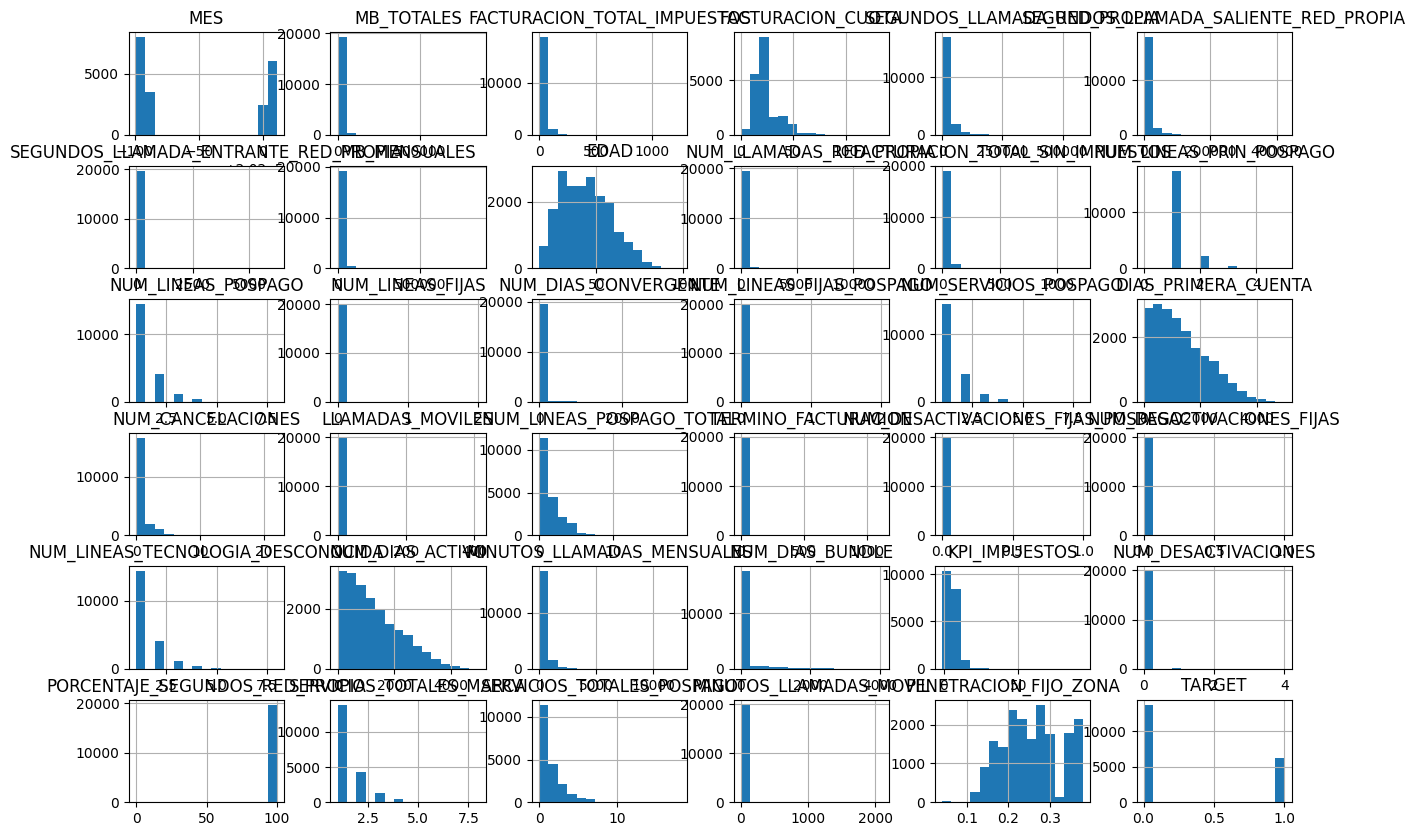

In [ ]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

Se calculan los **valores faltantes** por columnas ya que una de las necesidades de los algoritmos es que las bases de datos estén completas.

In [ ]:
# Se calculan los datos faltantes por columnas
valores_faltantes=data.isnull().sum()

# Se calcula el porcentaje
valores_faltantes_porc=100*valores_faltantes/len(data)

# Se une en un dataframe
valores_faltantes_df=pd.DataFrame({'Cuenta':valores_faltantes, 'percent': valores_faltantes_porc})
valores_faltantes_df.sort_values('percent', ascending=False)


,Cuenta,percent
PENETRACION_FIJO_ZONA,1323,6.615
NUM_DIAS_ACTIVO,550,2.750
PORCENTAJE_SEGUNDOS_RED_PROPIA,263,1.315
MB_TOTALES,259,1.295
MINUTOS_LLAMADAS_MENSUALES,251,1.255
MB_MENSUALES,251,1.255
SEGUNDOS_LLAMADA_RED_PROPIA,157,0.785
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,157,0.785
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,157,0.785
NUM_LLAMADAS_RED_PROPIA,157,0.785


Se observa que existen **valores faltantes** en los datos que hay que completar. Para decidir con que se imputan los datos se van a graficar boxplots para ver su distribución.

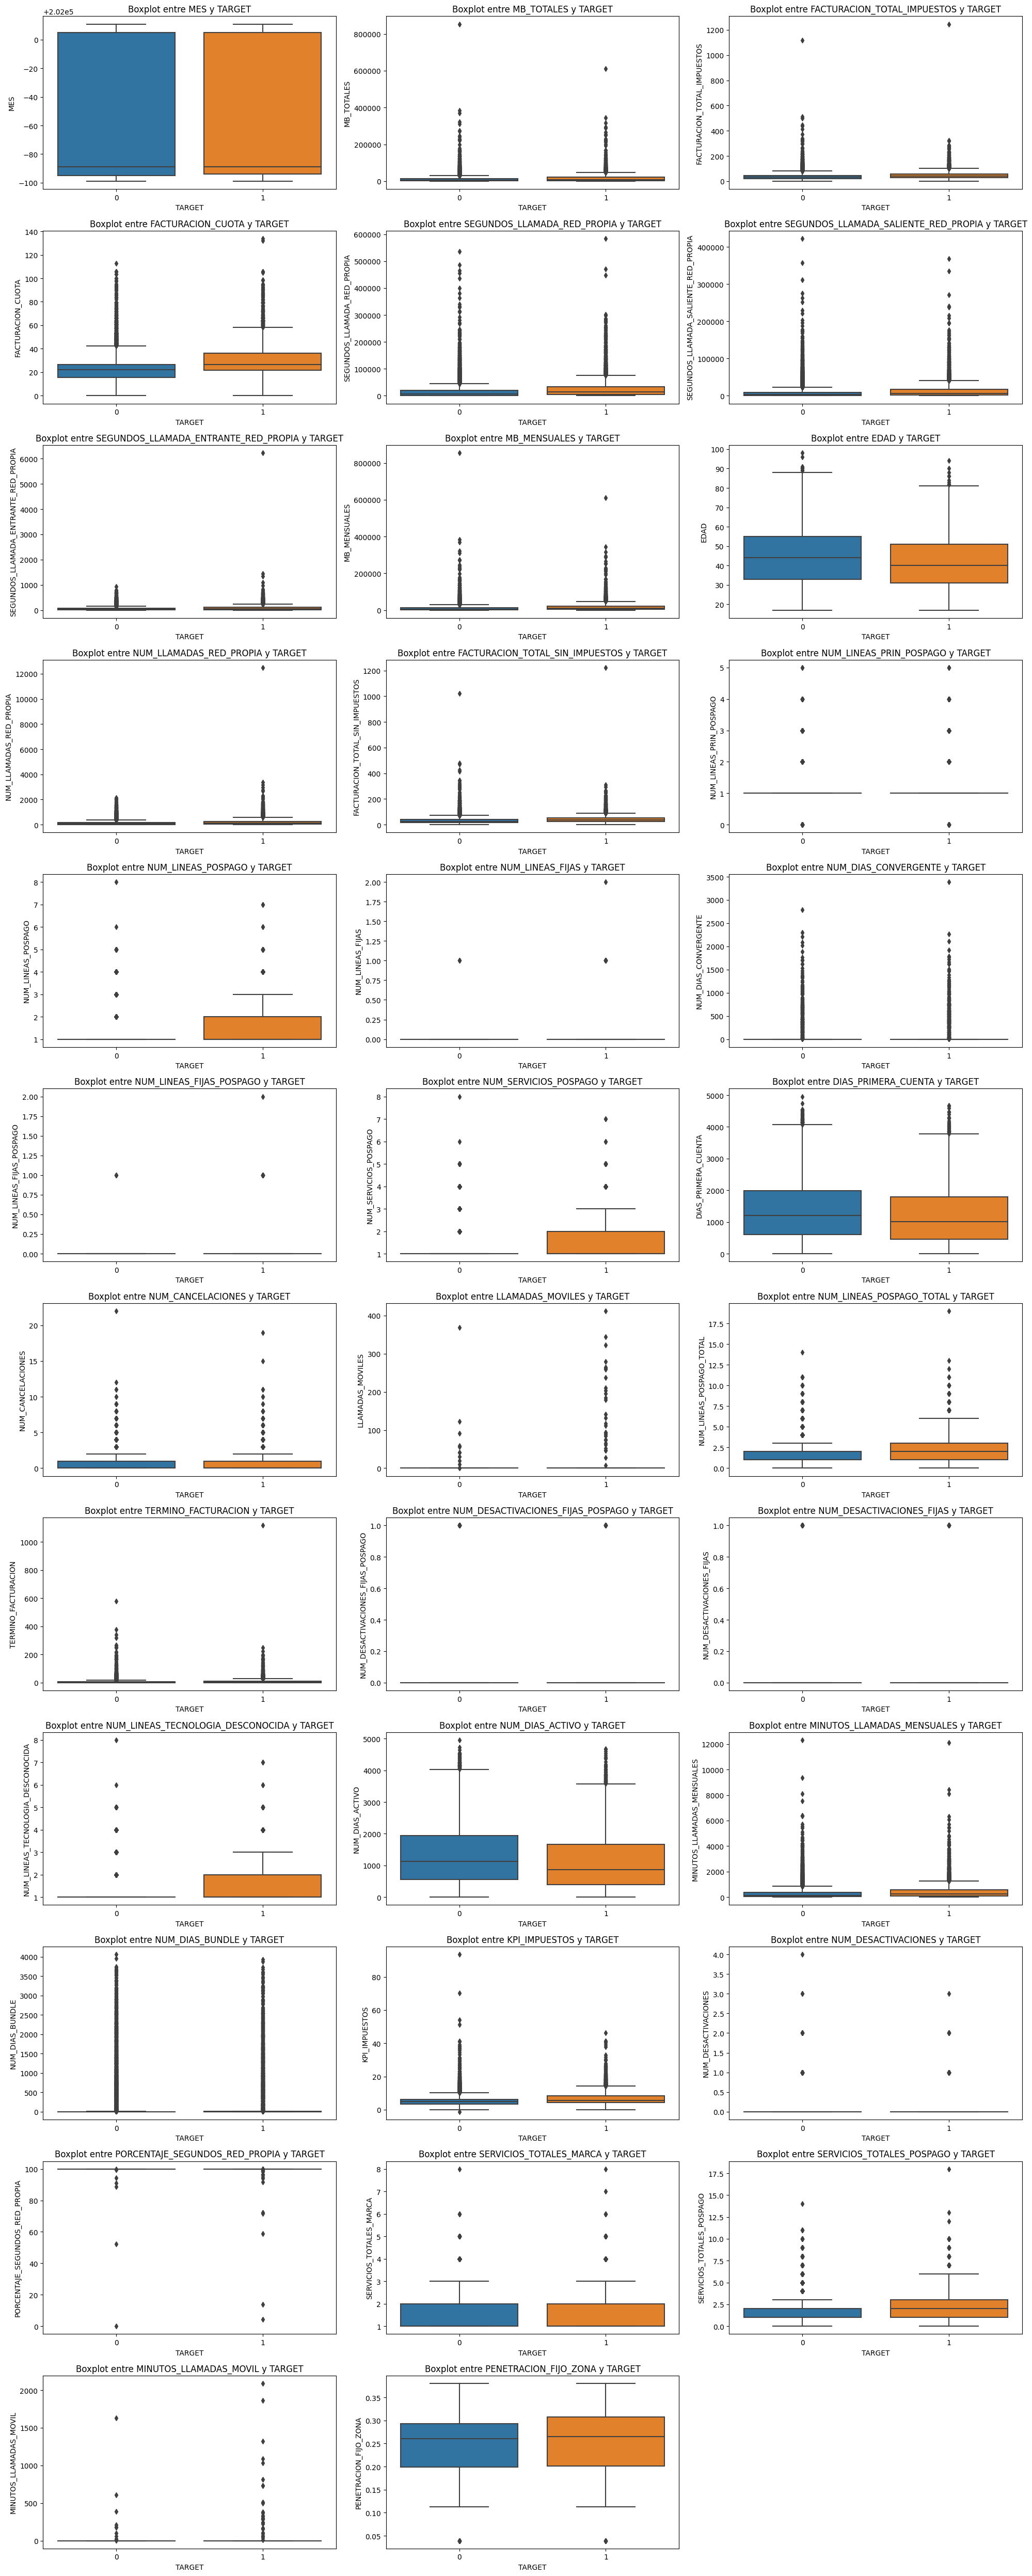

In [ ]:
plt.figure(figsize=(20, 50))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(x='TARGET', y=column, data=data)
    plt.title(f'Boxplot entre {column} y TARGET')

plt.tight_layout()
plt.show()

Se observa una gran cantidad de **valores atípicos** por lo que lo más correcto será imputar los valores faltantes con la **mediana** de cada variable. Este paso se realizará más adelante ya que primero se quiere ver el resto de las características de los datos originales. A continuación se muestra el número de valores atípicos por variable y el total de ellos, se observa que el 50% de las instancias contiene algún atípico por lo que eliminarlos no es una buena opción ya que se reduciría la base de datos a la mitad.

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Se identifican los límites del rango intercuartílico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Valores atípicos por columna
atipicos = ((data < limite_inferior) | (data > limite_superior)).sum()


print("Número total de valores atípicos por columna:")
print(atipicos)

# Se calcula el número total de filas que se eliminarían
outliers_mask = ((data < limite_inferior) | (data > limite_superior))
total_rows_to_drop = outliers_mask.any(axis=1).sum()

print("Número total de filas que se eliminarían:", total_rows_to_drop)

Número total de valores atípicos por columna:
MES                                        0
MB_TOTALES                              1291
FACTURACION_TOTAL_IMPUESTOS             1037
FACTURACION_CUOTA                       1791
SEGUNDOS_LLAMADA_RED_PROPIA             1807
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA    1906
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA    1342
MB_MENSUALES                            1298
EDAD                                      40
NUM_LLAMADAS_RED_PROPIA                 1425
FACTURACION_TOTAL_SIN_IMPUESTOS         1010
NUM_LINEAS_PRIN_POSPAGO                 2675
NUM_LINEAS_POSPAGO                       423
NUM_LINEAS_FIJAS                          21
NUM_DIAS_CONVERGENTE                     654
NUM_LINEAS_FIJAS_POSPAGO                  21
NUM_SERVICIOS_POSPAGO                    423
DIAS_PRIMERA_CUENTA                      101
NUM_CANCELACIONES                       1475
LLAMADAS_MOVILES                          42
NUM_LINEAS_POSPAGO_TOTAL                1966
TERMINO_F

Otra a cosa a tener en cuenta es la correlación entre las variables, por lo que se realiza una **matriz de correlación.**

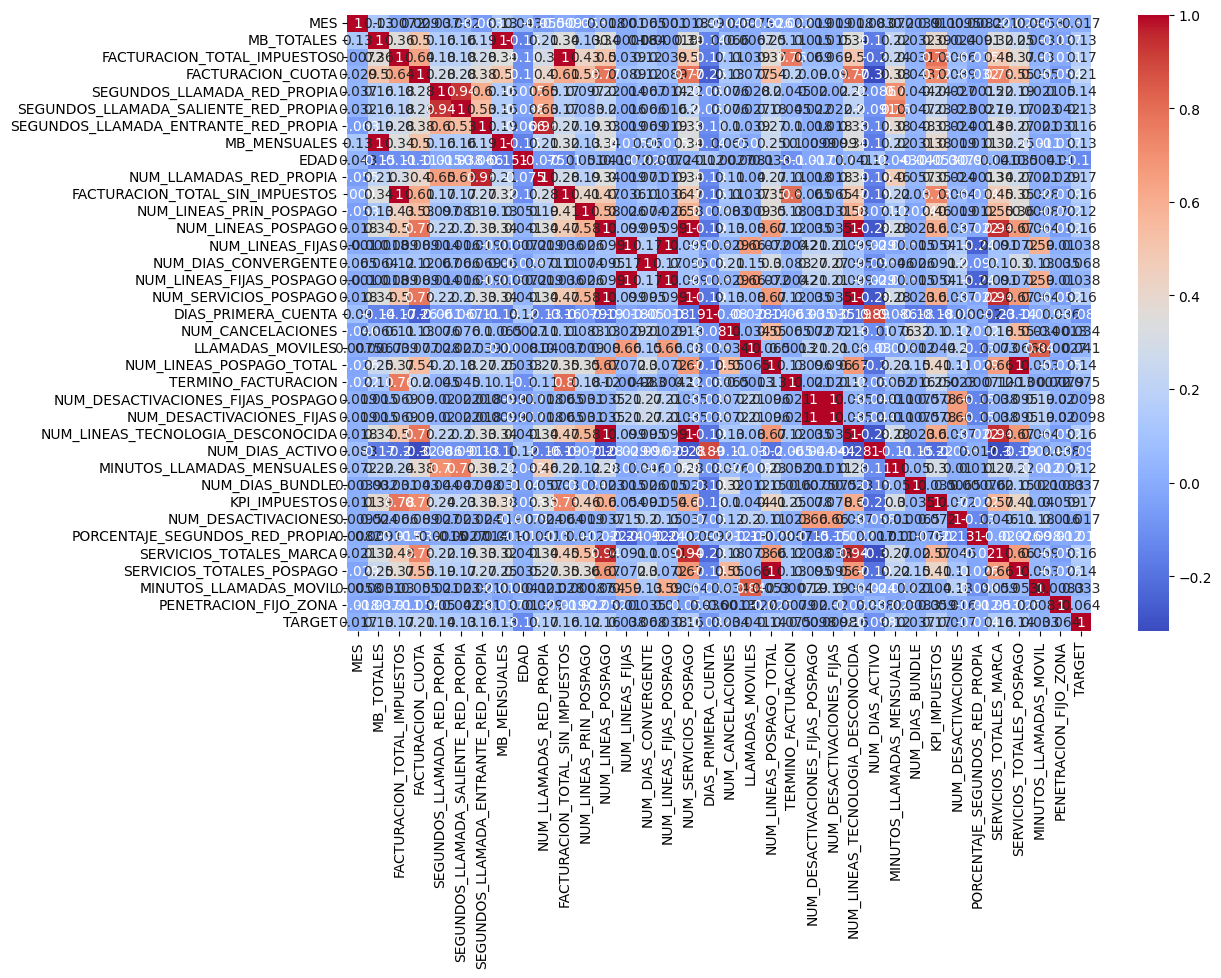

In [ ]:
matriz_correlacion = data.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()


Al tener tantas variables es complicado visualizar con claridad la relación entre ellas, asi que numéricamente se verá cuales tienen una **correlación** **superior** a **0.94**

In [ ]:
# Se define un umbral
umbral_correlacion = 0.94  # Numero obtenido después de algunas pruebas ya que hay varias correlaciones por
# encima de 0.94 pero por debajo de 0.95

for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i, j]) >= umbral_correlacion:
            colname_i = matriz_correlacion.columns[i]
            colname_j = matriz_correlacion.columns[j]
            correlacion = matriz_correlacion.iloc[i, j]
            print(f"{colname_i} y {colname_j} tienen una correlación de {correlacion}")


MB_MENSUALES y MB_TOTALES tienen una correlación de 0.9997100412489456
NUM_LLAMADAS_RED_PROPIA y SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA tienen una correlación de 0.9592917635859339
FACTURACION_TOTAL_SIN_IMPUESTOS y FACTURACION_TOTAL_IMPUESTOS tienen una correlación de 0.9967847505236884
NUM_LINEAS_FIJAS_POSPAGO y NUM_LINEAS_FIJAS tienen una correlación de 1.0
NUM_SERVICIOS_POSPAGO y NUM_LINEAS_POSPAGO tienen una correlación de 1.0
NUM_DESACTIVACIONES_FIJAS y NUM_DESACTIVACIONES_FIJAS_POSPAGO tienen una correlación de 1.0
NUM_LINEAS_TECNOLOGIA_DESCONOCIDA y NUM_LINEAS_POSPAGO tienen una correlación de 1.0
NUM_LINEAS_TECNOLOGIA_DESCONOCIDA y NUM_SERVICIOS_POSPAGO tienen una correlación de 1.0
SERVICIOS_TOTALES_MARCA y NUM_LINEAS_POSPAGO tienen una correlación de 0.9441136413907497
SERVICIOS_TOTALES_MARCA y NUM_SERVICIOS_POSPAGO tienen una correlación de 0.9441136413907497
SERVICIOS_TOTALES_MARCA y NUM_LINEAS_TECNOLOGIA_DESCONOCIDA tienen una correlación de 0.9441136413907497
SERVICIOS_TOTA

Se **eliminan** por tener una correlación igual a 1:
- NUM_LINEAS_TECNOLOGIA_DESCONOCIDA
- NUM_LINEAS_FIJAS_POSPAGO
Estas dos están tienen correlación 1 con dos variables a la vez. Por otra parte, tienen correlación 1 con otra variable y también se **eliminan**:
- NUM_LINEAS_FIJAS_POSPAGO
- NUM_DESACTIVACIONES_FIJAS_POSPAGO

Para decidir que variable conservar cuando la correlación no es igual a 1 se utilizarán distintos criterios. En primer lugar la correlación de SERVICIOS_TOTALES_MARCA con NUM_LINEAS_POSPAGO, NUM_SERVICIOS_POSPAGO y NUM_LINEAS_POSPAGO_TOTAL es la misma por lo que conservar solo SERVICIOS_TOTALES_MARCA es la mejor opción ya que incluye todos lo servicios y eliminamos 3 variables redundantes.

En segundo lugar para decidir si conservar MB_MENSUALES o MB_TOTALES se comprobará que variable tiene más valores faltantes.

In [ ]:
faltantes_mb_mensuales = data['MB_MENSUALES'].isnull().sum()
print(faltantes_mb_mensuales)

faltantes_mb_totales = data['MB_TOTALES'].isnull().sum()
print(faltantes_mb_totales)

251
259


La variable MB_MENSUALES tiene **menos datos faltantes** así será la que permanezca en el modelo. Se hace el mismo procedimiento para  el par NUM_LLAMADAS_RED_PROPIA y SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA, el par
FACTURACION_TOTAL_SIN_IMPUESTOS y FACTURACION_TOTAL_IMPUESTOS y el par SERVICIOS_TOTALES_POSPAGO y NUM_LINEAS_POSPAGO_TOTAL.

In [ ]:
print(data['NUM_LLAMADAS_RED_PROPIA'].isnull().sum())
print(data['SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA'].isnull().sum())

print(data['FACTURACION_TOTAL_SIN_IMPUESTOS'].isnull().sum())
print(data['FACTURACION_TOTAL_IMPUESTOS'].isnull().sum())

print(data['SERVICIOS_TOTALES_POSPAGO'].isnull().sum())
print(data['NUM_LINEAS_POSPAGO_TOTAL'].isnull().sum())


157
157
76
76
0
0


Como todas tienen el mismo número de valores faltantes se calcula cual es la **correlación** de cada una con la variable respuesta.

In [ ]:
correlation_with_response = matriz_correlacion['TARGET'].sort_values(ascending=False)

print("Correlación con la variable de respuesta:")
print(correlation_with_response)

Correlación con la variable de respuesta:
TARGET                                  1.000000
FACTURACION_CUOTA                       0.209766
NUM_LLAMADAS_RED_PROPIA                 0.169548
KPI_IMPUESTOS                           0.166943
FACTURACION_TOTAL_IMPUESTOS             0.166326
NUM_SERVICIOS_POSPAGO                   0.162534
NUM_LINEAS_TECNOLOGIA_DESCONOCIDA       0.162534
NUM_LINEAS_POSPAGO                      0.162534
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA    0.161436
FACTURACION_TOTAL_SIN_IMPUESTOS         0.161050
SERVICIOS_TOTALES_MARCA                 0.155940
NUM_LINEAS_POSPAGO_TOTAL                0.139588
SERVICIOS_TOTALES_POSPAGO               0.138991
SEGUNDOS_LLAMADA_RED_PROPIA             0.137680
MB_TOTALES                              0.133332
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA    0.133154
MB_MENSUALES                            0.132458
MINUTOS_LLAMADAS_MENSUALES              0.122470
NUM_LINEAS_PRIN_POSPAGO                 0.115967
TERMINO_FACTURACION        

Viendo los datos se quedarán en el modelo: NUM_LLAMADAS_RED_PROPIA , FACTURACION_TOTAL_IMPUESTOS y NUM_LINEAS_POSPAGO_TOTAL. Se procede a eliminar las variables correspondientes.


In [ ]:
data.drop(['NUM_LINEAS_TECNOLOGIA_DESCONOCIDA','NUM_LINEAS_FIJAS_POSPAGO','NUM_LINEAS_FIJAS_POSPAGO',
'NUM_DESACTIVACIONES_FIJAS_POSPAGO','SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA','FACTURACION_TOTAL_SIN_IMPUESTOS',
           'SERVICIOS_TOTALES_POSPAGO','MB_TOTALES'],axis=1, inplace= True)

A continuación se realizarán algunos **gráficos** para ver la relación entre **distintas variables** y la **variable respuesta**.

Se crean nuevas variables separando el mes y el año para graficarlas con la variable respuesta.

In [ ]:
data2 = pd.DataFrame({'MES': [1]*20000})
data2['MES'] = pd.to_datetime(data['MES'], format = '%Y%m')
data2['TARGET'] = data['TARGET']

In [ ]:
data2['ANIO'] = data2['MES'].dt.year


In [ ]:
data2['MES2'] = data2['MES'].dt.month

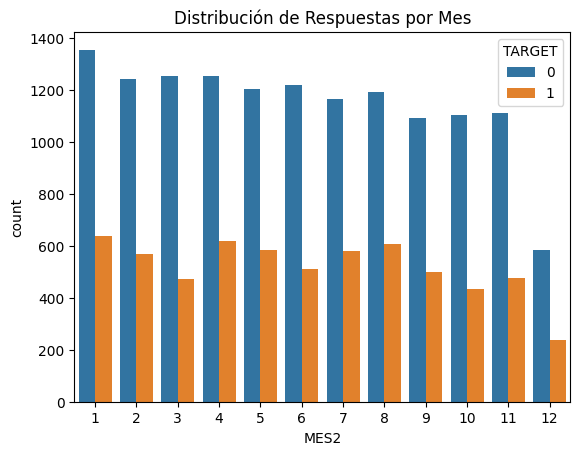

In [ ]:
# Gráfico de barras para ver la relación entre la variable respuesta y cada mes
sns.countplot(x='MES2', hue='TARGET', data=data2)
plt.title('Distribución de Respuestas por Mes')
plt.show()

No se puede sacar ninguna conclusión relevante con respecto a los meses en los que sí se adquirieron productos. Presenta una distribución bastante **uniforme** menos en el mes de diciembre. Se podría ver algún patrón en que después de un mes de subida van 3 meses seguidos con menos productos que el anterior, pero no parece lo suficientemente relevante.

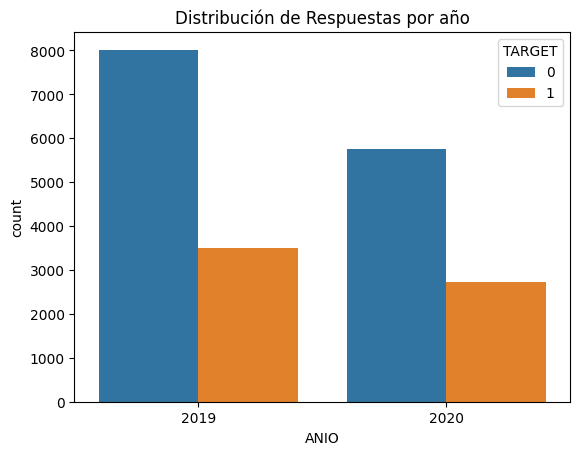

In [ ]:
# Gráfico de barras para ver la relación entre la variable respuesta y cada año
sns.countplot(x='ANIO', hue='TARGET', data=data2)
plt.title('Distribución de Respuestas por año')
plt.show()

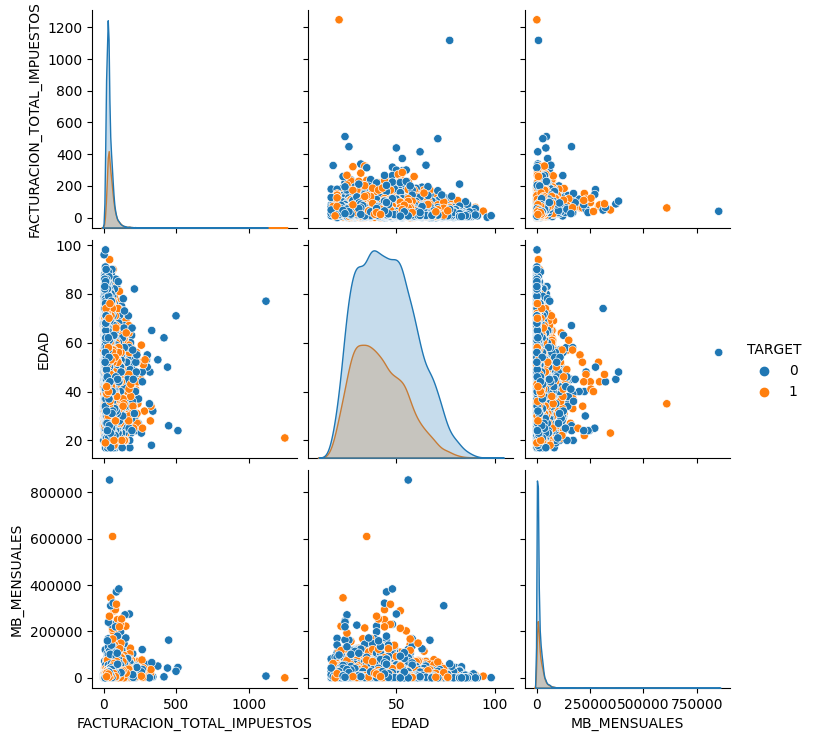

In [ ]:
sns.pairplot(data, vars=['FACTURACION_TOTAL_IMPUESTOS', 'EDAD','MB_MENSUALES'], hue='TARGET')
plt.show()

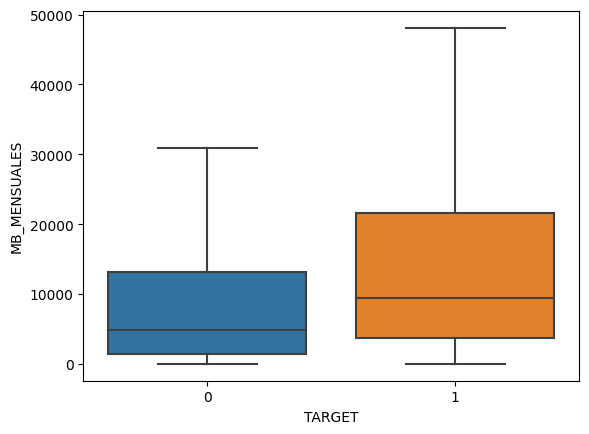

In [ ]:
sns.boxplot(x='TARGET', y='MB_MENSUALES', data=data, showfliers=False) # Para poder ver bien la relación no se grafican los atípicos
plt.show()

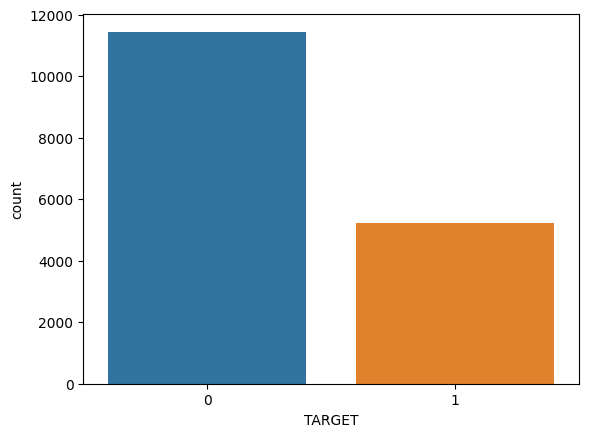

In [ ]:
# Como se distribuye la variable objetivo.
sns.countplot(x='TARGET', data=data)
plt.show()


Se observa que hay muchos más clientes que no adquieren productos.

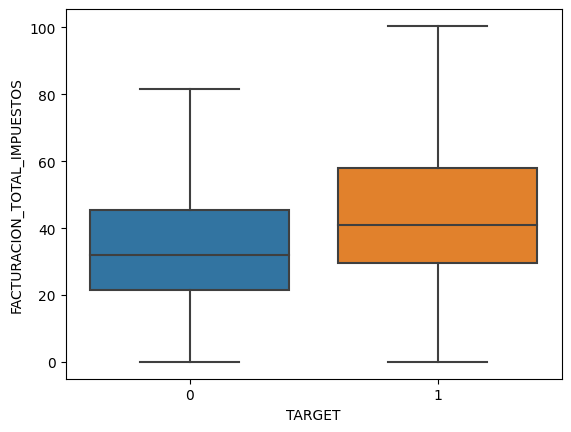

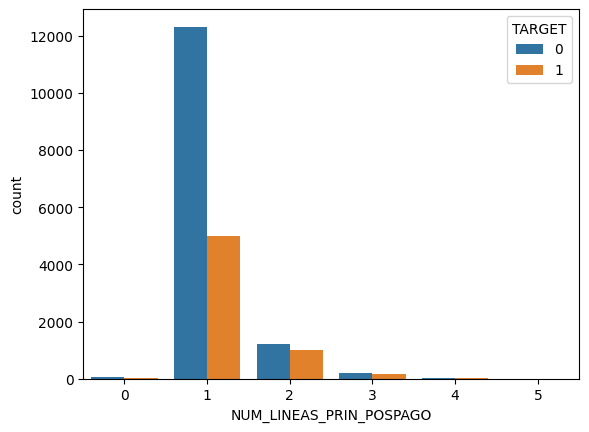

In [ ]:
# Comparación de variables entre clases de TARGET
sns.boxplot(x='TARGET', y='FACTURACION_TOTAL_IMPUESTOS', data=data,showfliers=False)
plt.show()

sns.countplot(x='NUM_LINEAS_PRIN_POSPAGO', hue='TARGET', data=data)
plt.show()


Parece que los clientes que **más megas** consumen son más **propensos** a **contratar** otros **servicios**, así como si tienen 2 líneas principales. Se observa que si los clientes solo tienen una línea es menos probable que contraten más servicios que si tienen 2 líneas.

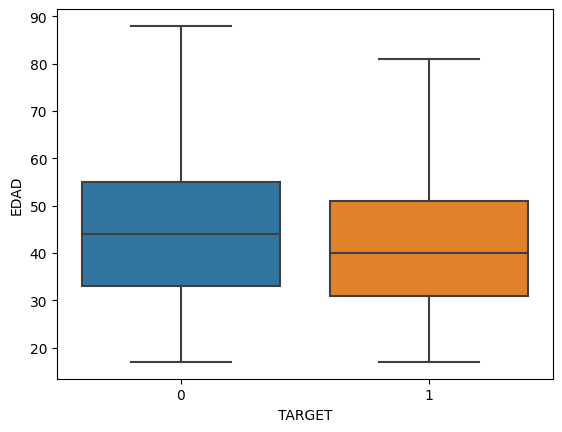

In [ ]:
sns.boxplot(x='TARGET', y='EDAD', data=data,showfliers=False)
plt.show()

Se hacen gráficos de **boxplot** de todas las variables a la vez.

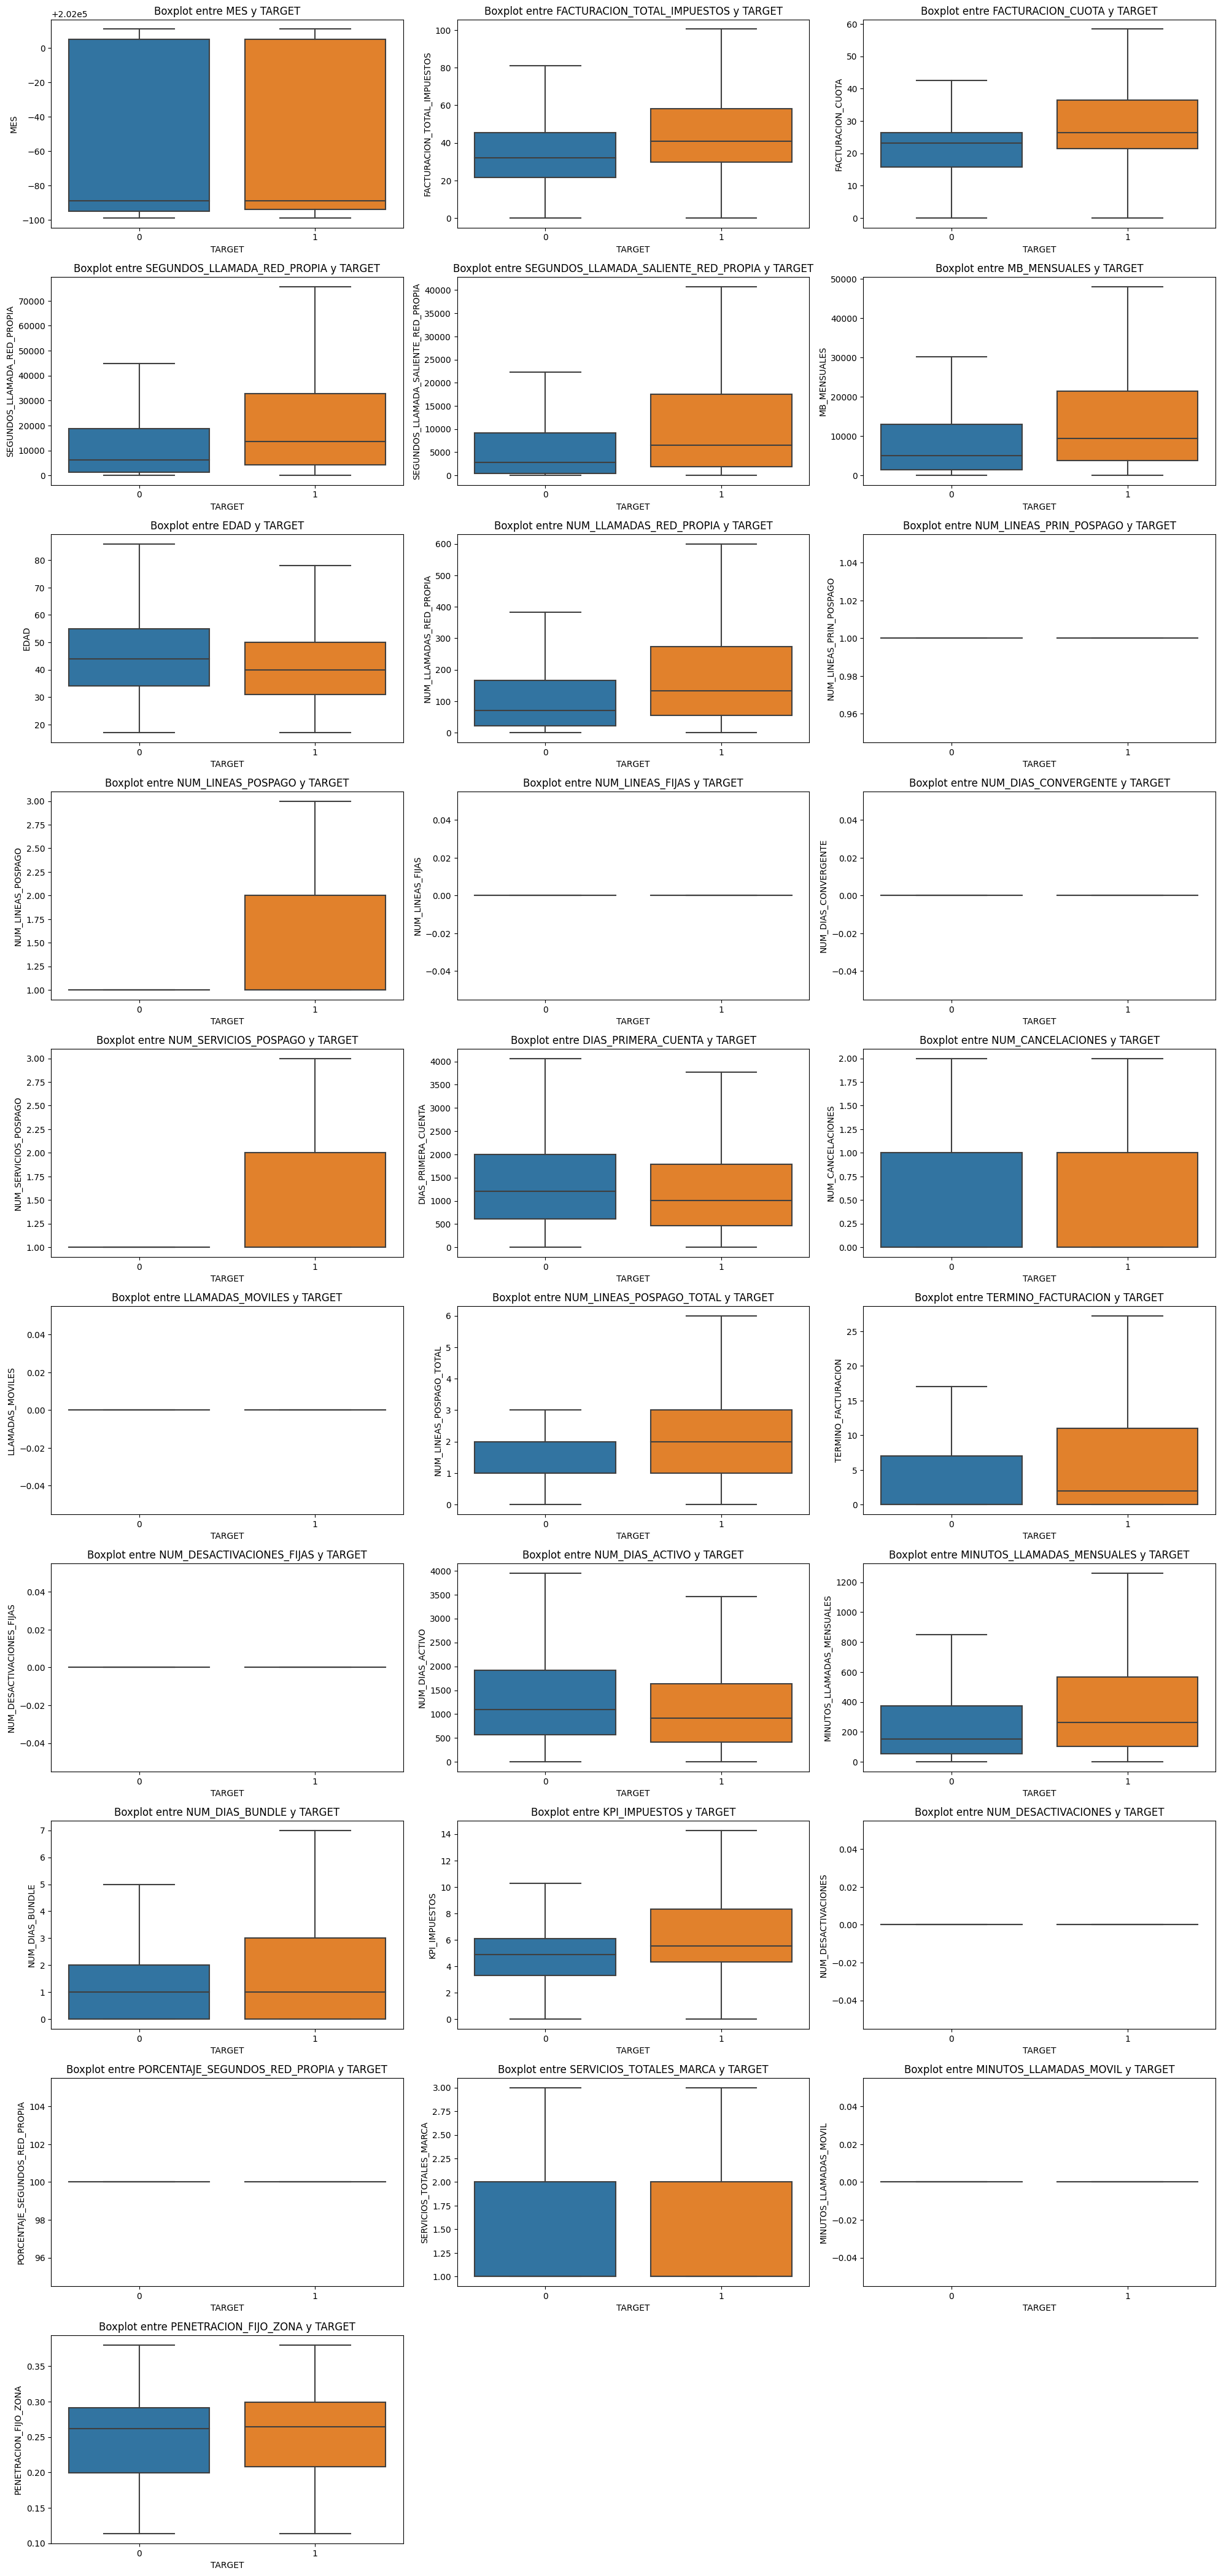

In [ ]:
plt.figure(figsize=(20, 50))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(x='TARGET', y=column, data=data, showfliers=False)
    plt.title(f'Boxplot entre {column} y TARGET')

plt.tight_layout()
plt.show()

Vistos estos gráficos parece que quienes adquieren un nuevo producto tienen menor edad, hacen más uso de los productos (más consumo, facturación, llamadas..) y son clientes desde hace menos tiempo.

Una vez vistas las características de los datos se imputan con la **mediana** los datos faltantes.

In [ ]:
data = data.apply(lambda col: col.fillna(col.median()), axis=0)

# Modelos

## **Random forest**


El primer modelo que se va a implementar es un **Random Forest**. Un modelo de este tipo consta de varios árboles de decisión individuales, cada uno de estos árboles se entrena utilizando muestras de datos de entrenamiento ligeramente diferentes creadas mediante una técnica llamada **bootstrapping**. Las predicciones de todos los árboles que componen el modelo se combinan para crear nuevas observaciones.

Algunas ventajas de este tipo de modelos son: pueden aplicarse tanto a modelos de clasificación como de regresión, son capaces de seleccionar los predictores más relevantes, son capaces de manejar predictores tanto numéricos como categóricos sin tener que crear variables dummy y son poco susceptibles a ser afectados por valores atípicos.

Uno de los grandes retos en el aprendizaje automático es encontrar el equilibrio entre el sesgo y la varianza. El sesgo mide como de lejos se encuentra el valor estimado frente al valor real y la varianza hace referencia a cuánto cambia el modelo en función de los datos de entrenamiento utilizados. Lo mejor es que un modelo no varíe mucho ante cambios en la muestra de entrenamiento ya que esto indicaría que el modelo está memorizando en lugar de aprender. Además cuando aumenta la complejidad del modelo este puede adaptarse mejor a las observaciones lo que supone una reducción del sesgo pero un aumento de la varianza. La clave está en encontrar el equilibrio entre estas dos métricas y esto se puede llevar a cabo mediante los métodos emsamble.

Los métodos ensamble se basan en la combinación de múltiples modelos en uno solo para encontrar el mejor equilibrio entre sesgo y varianza, los tipos de emsamble más utilizados son "**Bagging**" y "**Boosting**". En este se mencionará el método **Bagging** que es el utilizado en los modelos Random Forest. El método bagging ajusta diferentes modelos cada uno con un subconjunto distintos de datos de entrenamiento y todos estos modelos aportan su predicción. La predicción final será la media de todas las predicciones individuales.

Otra de las ventajas que tienen los métodos Bagging es que es posible estimar el error de la muestra test sin tener que hacer validación cruzada, que es más costoso computacionalmente. Los métodos Bootstrapping suelen utilizar en cada ajuste dos tercios de los datos originales por lo que queda otro tercio al que se le llama **out-of-bag (OOB)**.

Por ello en el proceso de Bagging, si se registra qué observaciones se utilizaron para ajustar cada árbol, será posible predecir la respuesta de cada observación excluyendo los árboles en los que ha participado. Después se puede calcular el error OBB haciendo la media de las predicciones que se han obtenido de estos árboles.

Una de las principales desventajas de los modelos Random Forest es que aunque mejoran las predicciones de los árboles normales, su interpretación es más difícil al no tener un solo árbol y no poder representarse gráficamente. Por ello es que se utilizan dos herramientas para poder saber la importancia de los predictores, la importancia por permutación y la impureza de nodos.

El primer paso es dividir el conjunto de datos en dos muestras, una de entrenamiento y otra de prueba.

In [ ]:
X=data.drop('TARGET', axis=1)
y=data['TARGET']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=43)


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Antes de entrenar el modelo final, el primer hiperparámetro que se va a ajustar es el número de árboles que creará el modelo ya que este no es un hiperparámetro crítico, ya que cuantos más árboles más precisión habrá, pero a su vez lleva implícito una pérdida de recursos computacionales.

Valor óptimo de estimadores: 126


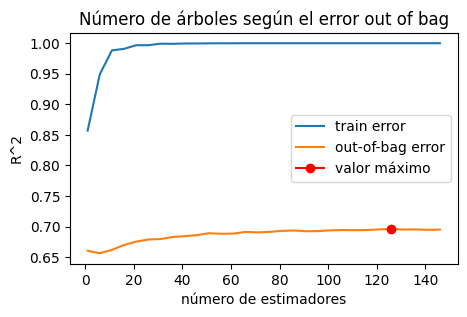

In [ ]:
warnings.filterwarnings('ignore')

metrica_ent = []
oob_error   = []

rango_estimador = range(1, 150, 5)

# Se crea un bucle para entrenar el modelo random forest con el valor de distintos estimadores y se saca el error de entrenamiento
# y el oob error para ver cuál es el número más apropiado

for n_estimators in rango_estimador:
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'gini',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(x_train_scaled, y_train)
    metrica_ent.append(modelo.score(x_train_scaled, y_train))
    oob_error.append(modelo.oob_score_)


fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(rango_estimador, metrica_ent, label="train error")
ax.plot(rango_estimador, oob_error, label="out-of-bag error")
ax.plot(rango_estimador[np.argmax(oob_error)], max(oob_error),
        marker='o', color = "red", label="valor máximo")
ax.set_ylabel("R^2")
ax.set_xlabel("número de estimadores")
ax.set_title("Número de árboles según el error out of bag")
plt.legend();
print(f"Valor óptimo de estimadores: {rango_estimador[np.argmax(oob_error)]}")
warnings.filterwarnings('default')

Se ha obtenido que el **número óptimo de** **estimadores** es **126** por lo que se procede a ajustar los demás hiperparámetros solo con ese número de árboles para que el coste computacional no sea tan grande. Se van a ajustar los siguientes hiperparámetros:
- **max_features:** controla la cantidad máxima de características que se deben considerar al dividir un nodo.
- **max_depth :** controla la profundidad máxima de cada árbol.
- **criterion:** determina la función de calidad que se utiliza para medir la pureza de una división del nodo. Las dos opciones son "*gini*" y "*entropy*".

In [ ]:
param_grid = ParameterGrid(
                {'n_estimators': [126],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )


resultados = {'parametros': [], 'oob_accuracy': []}

In [ ]:
for parametros in param_grid:

    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** parametros
             )

    modelo.fit(x_train_scaled, y_train)

    resultados['parametros'].append(parametros)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {parametros}")


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 126}
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 9, 'n_estimators': 126}
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 126}
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'n_estimators': 126}
Modelo: {'criterion': 'entropy', 'max_dept

In [ ]:
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['parametros'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'parametros')
resultados.head(4)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
4,0.701533,gini,10,7,126
13,0.701000,entropy,10,7,126
5,0.700467,gini,10,9,126
14,0.700200,entropy,10,9,126


El mejor ajuste de hiperparámetros ofrece un acierto del **70.15%** en la muestra de entrenamiento.

In [ ]:
best_params = resultados.iloc[0, :].to_dict()
best_params['max_depth'] = int(best_params['max_depth'])
print(best_params)

{'oob_accuracy': 0.7015333333333333, 'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 126}


El código ha devuelto que esos son los **mejores hiperparámetros** encontrados por el método **Out-of-bag** por lo que se procede a entrenar el modelo con esos hiperparámetros.

In [ ]:
warnings.filterwarnings('ignore')
modelo_final = RandomForestClassifier()
modelo_final.set_params(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    oob_score=True,
    n_jobs=-1,
    random_state=123
)

modelo_final.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=10, max_features=7, n_estimators=126,
                       n_jobs=-1, oob_score=True, random_state=123)

El último paso es evaluar la **capacidad predictiva** del modelo con el conjunto de datos de test.

In [ ]:
predicciones =modelo_final.predict(X = x_test_scaled)

Se crea una **matriz de confusión** para evaluar más visualmente los resultados.

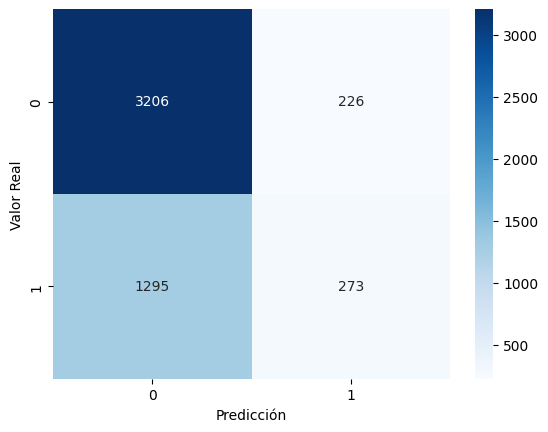

El accuracy de la muestra test es: 69.58 %


In [ ]:
warnings.filterwarnings('ignore')
matriz_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )


sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()
print(f"El accuracy de la muestra test es: {100 * accuracy} %")


Se muestra una tabla con las métricas más importantes del modelo final.

In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      3432
           1       0.55      0.17      0.26      1568

    accuracy                           0.70      5000
   macro avg       0.63      0.55      0.54      5000
weighted avg       0.66      0.70      0.64      5000



Antes de umbralizar los resultados se obtiene una **precisión del 69.58%** si no se tiene en cuenta el **desequilibrio entre clases** y un **66%** si se tiene en cuenta este hecho. Una vez creado y evaluado el modelo se **umbralizan** los resultados. Para ello lo primero es crear la curva ROC.

In [ ]:
y_pred_train = modelo_final.predict_proba(x_train_scaled)[:,1]
y_pred_test = modelo_final.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_test)
roc_auc_train = metrics.auc(fpr, tpr)
roc_auc_test = metrics.auc(fpr_test, tpr_test)
roc_auc = auc(fpr, tpr)

In [ ]:
 modelo_final.predict_proba(x_train_scaled)[:,1]

array([0.2477808 , 0.48042031, 0.29634385, ..., 0.35800981, 0.35153305,
       0.39935229])

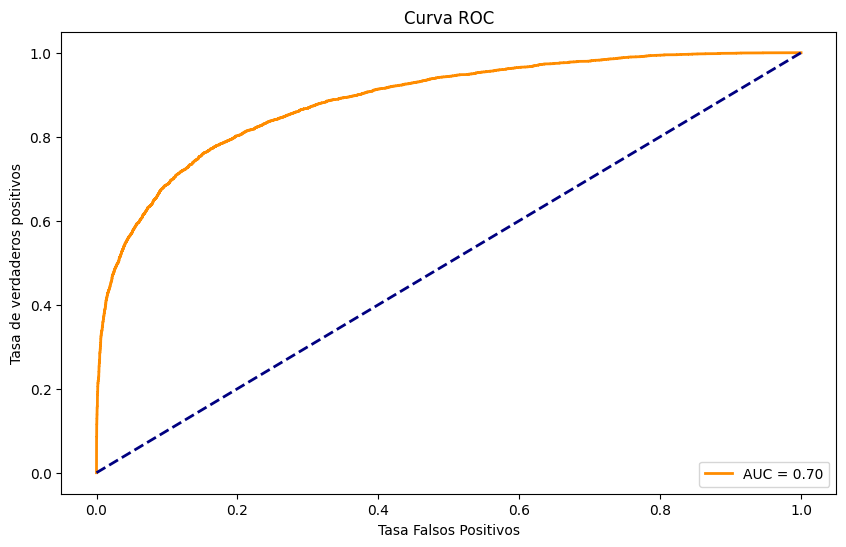

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

En el contexto en el que se está trabajando es **importante** **minimizar** los **falsos** **negativos**, ya que el coste de perder la oportunidad de vender un producto a un cliente potencial tiene un impacto económico más grande que el coste de ofrecerselo y que lo rechace. Por lo tanto el umbral no debe ser excesivamente alto, se **optará** por un **50%**.

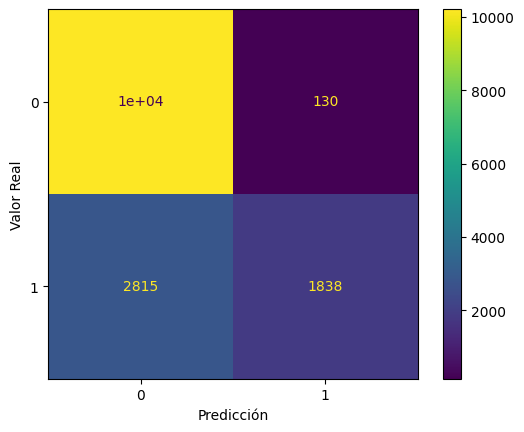

In [ ]:
umbral = 0.50
y_umbralizadas_train = 1*(y_pred_train > umbral)

cm = metrics.confusion_matrix(y_train, y_umbralizadas_train, labels=modelo_final.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo_final.classes_)
disp.plot()
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, y_umbralizadas_train)
print("Accuracy:", accuracy)

report = classification_report(y_train, y_umbralizadas_train)
print("Classification Report:")
print(report)

Accuracy: 0.8036666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87     10347
           1       0.93      0.40      0.56      4653

    accuracy                           0.80     15000
   macro avg       0.86      0.69      0.71     15000
weighted avg       0.83      0.80      0.78     15000



Con los **resultados umbralizados** se concluye  que la **precisión** del modelo es del **80.36%** y si se calcula ponderando con la cantidad de instancias de cada clase es del **83%**. Otra métrica  importante es la **sensibilidad** que mide la capacidad del modelo para **identificar** **correctamente** las **instancias positivas** **cuando** realmente **lo son**, en este caso es del 80%. La métrica F1 es la media armónica entre la precisión y la sensibilidad y es de un 78%.

Por último se crea una tabla para ver cuáles son las **variables** con más **importancia** por pureza de nodos para el modelo.

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de cada predictor en el modelo")

importancia_predictores.sort_values('importancia', ascending=False)

Importancia de cada predictor en el modelo


,predictor,importancia
1,FACTURACION_TOTAL_IMPUESTOS,0.111728
5,MB_MENSUALES,0.093457
7,NUM_LLAMADAS_RED_PROPIA,0.073317
3,SEGUNDOS_LLAMADA_RED_PROPIA,0.073095
4,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,0.069747
6,EDAD,0.058999
22,KPI_IMPUESTOS,0.058657
20,MINUTOS_LLAMADAS_MENSUALES,0.054538
2,FACTURACION_CUOTA,0.054511
13,DIAS_PRIMERA_CUENTA,0.053789


## **Redes neuronales con Tensorflow**

Una **red neuronal** es un modelo que emula el modo en que el cerebro humano procesa la información. Las unidades se dividen en **capas** y por lo general hay 3 partes: una **capa de entrada**, una o varias **capas** **ocultas** y una **capa** de **salida**. Las unidades se conectan con ponderaciones a lo largo del recorrido y la forma en la que la neurona aprende es examinando las predicciones individuales y realizando ajustes en las ponderaciones para mejorar el resultado. Otro elemento de las redes neuronales son las funciones de activación que son aplicadas en la entrada de cada neurona y determina si la neurona debe activarse o no.

Se va a construir una red neuronal con una capa de entrada, tres capas ocultas y una capa de salida. A continuación se define la red neuronal:

- **Capa de entrada:** se define una capa con 256 neuronas, una función de activación ***Relu***, una regularización ***L2*** y un parámetro de 0.01.

- **Capas ocultas:** se definen 3 capas ocultas con 128, 64 y 32 neuronas.

- **Capa de salida:** se define la capa de salida con una sola neurona y función de activación sigmoide al ser un problema de clasificación binaria.

***Relu*** es una función matemática que funciona definida $f(x) = max(0,x)$ lo que significa que si la entrada es positiva, la salida es x y si es negativa la salida es 0.

***L2*** es una técnica de regularización que se utiliza para **evitar** el **sobreajuste** ya que penaliza los pesos grandes en la red. Funciona sumando el cuadrado de todos los pesos en la red y agrega esta penalización a la función de pérdida durante el entrenamiento. El valor elegido es **0.01** y cuando mayor sea el valor más se penalizará a los pesos grandes.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])




Una vez creado el modelo se procede a configurar el proceso de entrenamiento. Se elige una **tasa de aprendizaje** de 0.0001 que controla el tamaño de los pasos que el optimizador toma para llegar a una solución. Se utiliza una **función de pérdida *loss*** que es lo que el modelo trata de minimizar durante el entrenamiento y como métrica de evaluación se elige la **precisión**.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               7424      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 50689 (198.00 KB)
Trainable params: 50689 (198.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


La última función proporciona información sobre la arquitectura de la red neuronal, el parámetro **Layer** indica las capas que están conectadas a la red, **Output Shape** muestra la forma de salida de la capa y **param** representa el número de parámetros entrenables en cada capa. Además se indica que el total de parámetros en la red son 50 689 y se ajustarán esos mismos. Se procede a entrenar el modelo con los datos de entrenamiento.

**Epochs** indica la cantidad de veces que el modelo verá todo el conjunto de entrenamiento, **batch_size** especifica cuántas muestras se utilizan antes de actualizar los pesos del modelo y **validation_split** indica que se reserva el 20% de datos de entrenamiento como conjunto de validación para ir viendo el rendimiento del modelo.

Además se utilizará el mismo umbral que en el modelo Random Forest (50%) por lo que la salida del modelo ya es con los datos umbralizados.

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Precisión:", accuracy)
print("Classification Report:\n", report)


Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 3.2304 - accuracy: 0.6911 - val_loss: 2.4832 - val_accuracy: 0.6930
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 1.9885 - accuracy: 0.6988 - val_loss: 1.5962 - val_accuracy: 0.6933
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 1.3266 - accuracy: 0.6992 - val_loss: 1.1184 - val_accuracy: 0.6943
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.9767 - accuracy: 0.6986 - val_loss: 0.8715 - val_accuracy: 0.6887
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7970 - accuracy: 0.6973 - val_loss: 0.7462 - val_accuracy: 0.6907
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.7065 - accuracy: 0.6948 - val_loss: 0.6822 - val_accuracy: 0.6887
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.6608 - accuracy: 0.6942 - val_loss: 0.6510 - val_accuracy: 0.6857

La **precisión** obtenida es del **68.81%** en **global**, pero para la clase 0 es del 71% y para la clase 1 del 55%. Esto puede ocurrir porque hay muchos más datos de la clase 0. El recall o **sensibilidad** mide la capacidad del modelo para identificar correctamente las instancias positiva cuando realmente son positivas y en este caso se ve que el modelo no maneja muy bien la clase 1 donde solo el 16% de las instancias que pertenecen a la clase 1 fueron correctamente identificadas. De forma global la **sensibilidad** sube hasta un **70%**. El valor de **F1** es del **67%**.

# **Conclusiones**

Tras abordar el problema planteado por la empresa de telecomunicaciones y realizar dos modelos predictivos, un Random Forest y una red neuronal se han obtenido resultados significativos que proporcionan información sobre la predisposición de los clientes a contratar nuevos productos.

Con el modelo **Random Forest** se logró una **precisión** del **80%** lo que indica una buena capacidad para capturar patrones. El modelo de **redes neuronales** consiguió una **precisión del 68%** y aunque es inferior a la del otro modelo sigue siendo aceptable. La empresa de telecomunicaciones debería elegir el modelo de Random Forest para sus predicciones pero siempre teniendo en cuenta la umbralización de los datos siguiendo objetivos específicos en el contexto empresarial.

## **Anexo: PCA**

En un primer momento una de las técnicas que se pensó aplicar fue un **análisis de componentes principales (PCA)** para reducir el número de variables y que el procesamiento fuera más rápido. Este es el procedimiento y las conclusiones de porqué no se llevó a cabo.


In [ ]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

Se crea una pipa que estandariza los datos, aplica un PCA y posteriormente se entrena.

In [ ]:
pca_pipa = make_pipeline(StandardScaler(), PCA())
pca_pipa.fit(data)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipa.named_steps['pca']

Se calcula cual es el porcentaje de varianza explicada por cada componente y el porcentaje de la varianza explicada acumulada.

Porcentaje de varianza explicada por cada componente tras el PCA
[2.31773749e-01 9.56259914e-02 8.64234588e-02 6.42095210e-02
 5.53399900e-02 5.47603380e-02 4.59571084e-02 3.96045338e-02
 3.62423337e-02 3.38615823e-02 3.30255899e-02 3.09504507e-02
 2.93004204e-02 2.49124473e-02 2.23770782e-02 1.87273561e-02
 1.79151214e-02 1.63222921e-02 1.45339253e-02 1.12262193e-02
 9.22237520e-03 7.51594472e-03 6.45193814e-03 5.10642964e-03
 3.61905943e-03 2.29025819e-03 1.99072478e-03 7.13762932e-04
 1.24923193e-33]


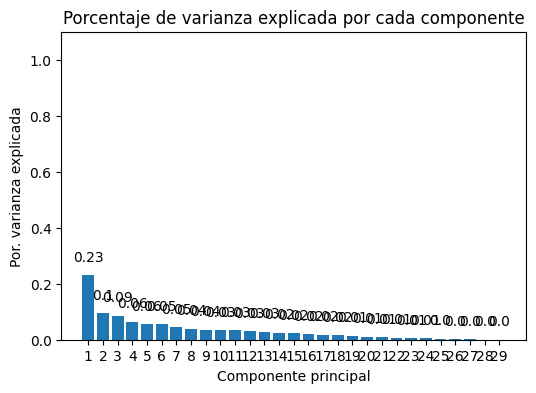

In [ ]:
print('Porcentaje de varianza explicada por cada componente tras el PCA')

print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Porcentaje de varianza explicada acumulada
[0.23177375 0.32739974 0.4138232  0.47803272 0.53337271 0.58813305
 0.63409016 0.67369469 0.70993702 0.74379861 0.7768242  0.80777465
 0.83707507 0.86198751 0.88436459 0.90309195 0.92100707 0.93732936
 0.95186329 0.96308951 0.97231188 0.97982783 0.98627977 0.99138619
 0.99500525 0.99729551 0.99928624 1.         1.        ]


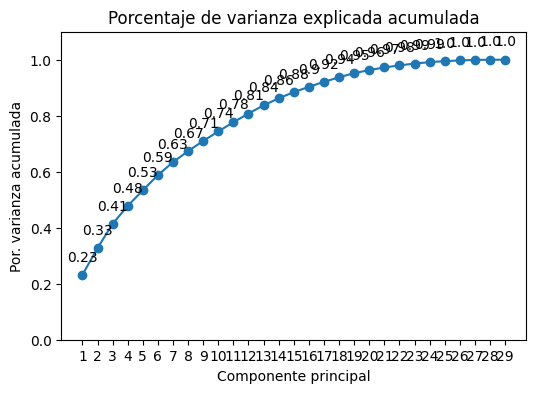

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Se calcula cuál es el número de componentes necesarios para explicar el 80% de la varianza.

In [ ]:
porcentaje_80 = np.argmax(prop_varianza_acum > 0.80) + 1

print(f'Número de componentes para explicar el 80% de la varianza: {porcentaje_80}')

variables_80 = data.columns[:porcentaje_80]

print('Variables que contribuyen al 80% de la varianza explicada:')
print(variables_80)


Número de componentes para explicar el 80% de la varianza: 12
Variables que contribuyen al 80% de la varianza explicada:
Index(['MES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA',
       'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
       'MB_MENSUALES', 'EDAD', 'NUM_LLAMADAS_RED_PROPIA',
       'NUM_LINEAS_PRIN_POSPAGO', 'NUM_LINEAS_POSPAGO', 'NUM_LINEAS_FIJAS',
       'NUM_DIAS_CONVERGENTE'],
      dtype='object')


In [ ]:
data2 = data[variables_80]

datos_nuevos = data[variables_80].copy()

datos_nuevos['TARGET'] = data['TARGET']

print(datos_nuevos.head())

Nuevo DataFrame con variables contribuyentes y la columna 'target':
      MES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901                    10.186000           0.000000   
1  201911                    32.005001          26.450001   
2  201906                    37.442001          31.400000   
3  202006                    20.001000          16.530000   
4  202001                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   MB_MENSUALES  EDAD  NUM_LLAMADAS_RED_PROPIA  NUM_LINEAS_PRIN_POSPAGO  \
0    232.121597  39.0                     54.0           

Se comprueba como predice el modelo Random Forest

In [ ]:
X2=datos_nuevos.drop('TARGET', axis=1)
y2=datos_nuevos['TARGET']

In [ ]:
x_train2, x_test2, y_train2, y_test2=train_test_split(X2,y2, test_size=0.25, random_state=43)

In [ ]:
scaler = StandardScaler()
x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

Valor óptimo de estimadores: 121


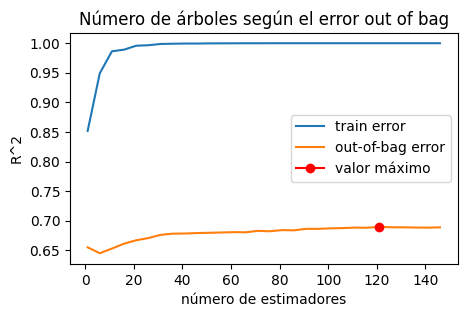

In [ ]:
warnings.filterwarnings('ignore')

metrica_ent = []
oob_error   = []

rango_estimador = range(1, 150, 5)

# Se crea un bucle para entrenar el modelo random forest con el valor de distintos estimadores y se saca el error de entrenamiento
# y el oob error para ver cuál es el número más apropiado

for n_estimators in rango_estimador:
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'gini',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(x_train_scaled2, y_train2)
    metrica_ent.append(modelo.score(x_train_scaled2, y_train2))
    oob_error.append(modelo.oob_score_)


fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(rango_estimador, metrica_ent, label="train error")
ax.plot(rango_estimador, oob_error, label="out-of-bag error")
ax.plot(rango_estimador[np.argmax(oob_error)], max(oob_error),
        marker='o', color = "red", label="valor máximo")
ax.set_ylabel("R^2")
ax.set_xlabel("número de estimadores")
ax.set_title("Número de árboles según el error out of bag")
plt.legend();
print(f"Valor óptimo de estimadores: {rango_estimador[np.argmax(oob_error)]}")
warnings.filterwarnings('default')

In [ ]:
param_grid = ParameterGrid(
                {'n_estimators': [121],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

resultados = {'parametros': [], 'oob_accuracy': []}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for parametros in param_grid:

    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
               ** parametros
             )

    modelo.fit(x_train_scaled2, y_train2)

    resultados['parametros'].append(parametros)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {parametros}")

Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 121}
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 9, 'n_estimators': 121}
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 121}
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'n_estimators': 121}
Modelo: {'criterion': 'entropy', 'max_dept

In [ ]:
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['parametros'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'parametros')
resultados.head(4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,oob_accuracy,criterion,max_depth,max_features,n_estimators
1,0.698600,gini,3,7,121
0,0.698333,gini,3,5,121
12,0.698000,entropy,10,5,121
2,0.697600,gini,3,9,121


In [ ]:
best_params = resultados.iloc[0, :].to_dict()
best_params['max_depth'] = int(best_params['max_depth'])
warnings.filterwarnings('ignore')
modelo_final = RandomForestClassifier()
modelo_final.set_params(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    oob_score=True,
    n_jobs=-1,
    random_state=123
)

modelo_final.fit(x_train_scaled2, y_train2)

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=121, n_jobs=-1,
                       oob_score=True, random_state=123)

In [ ]:
predicciones =modelo_final.predict(X = x_test_scaled2)

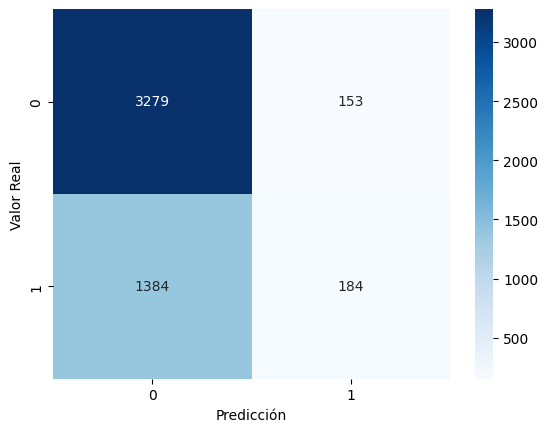

El accuracy de la muestra test es: 69.26 %


In [ ]:
warnings.filterwarnings('ignore')
matriz_confusion = confusion_matrix(
                    y_true    = y_test2,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test2,
            y_pred    = predicciones,
            normalize = True
           )


sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()
print(f"El accuracy de la muestra test es: {100 * accuracy} %")

In [ ]:
print(
    classification_report(
        y_true = y_test2,
        y_pred = predicciones
    )
)

In [ ]:
y_pred_train = modelo_final.predict_proba(x_train_scaled2)[:,1]
y_pred_test = modelo_final.predict_proba(x_test_scaled2)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train2, y_pred_train)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test2, y_pred_test)
roc_auc_train = metrics.auc(fpr, tpr)
roc_auc_test = metrics.auc(fpr_test, tpr_test)
roc_auc = auc(fpr, tpr)

In [ ]:
modelo_final.predict_proba(x_train_scaled2)[:,1]

array([0.21082759, 0.51042632, 0.34046383, ..., 0.25575057, 0.39439007,
       0.41236807])

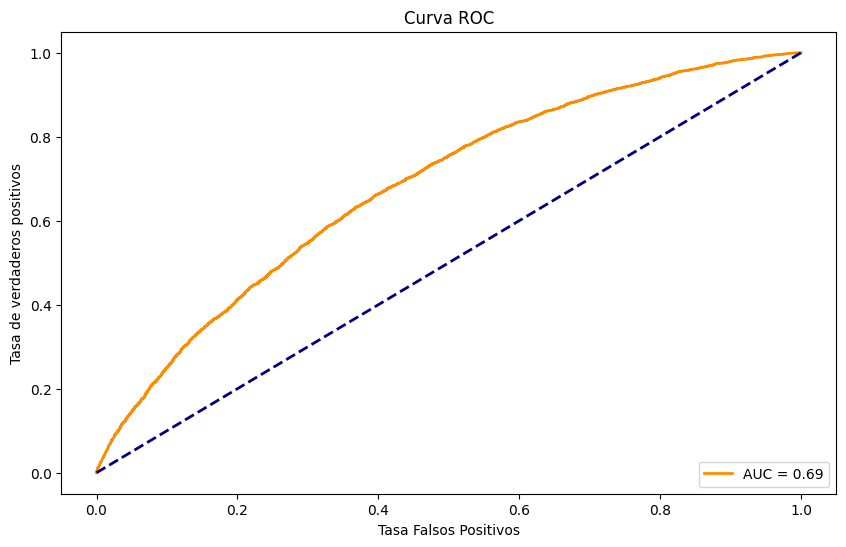

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
accuracy = accuracy_score(y_train2, y_umbralizadas_train)
print("Accuracy:", accuracy)

# Calcular y mostrar el classification report
report = classification_report(y_train2, y_umbralizadas_train)
print("Classification Report:")
print(report)

Accuracy: 0.8036666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87     10347
           1       0.93      0.40      0.56      4653

    accuracy                           0.80     15000
   macro avg       0.86      0.69      0.71     15000
weighted avg       0.83      0.80      0.78     15000



Como se puede observar el **rendimiento** del modelo es el **mismo** y el **tiempo de procesamiento** también ha sido el **mismo** por lo que no se aplicará un PCA por la pérdida de información que inevitablemente  se produce. En este caso 34 variables no son demasiadas pero en un proyecto con cientos de variables sí que podría ser útil aplicar esta técnica ya que el tiempo de procesamiento se podría ver reducido en gran cantidad sin afectar a los resultados.